In [1]:
import pandas as pd

# Percorso del file CSV locale nella stessa cartella
file_path = "dataset_diabete.csv"

# Caricamento del database utilizzando la funzione read_csv()
# C'è bisogno di specificare come interpretare il documento
data = pd.read_csv(file_path, encoding='latin-1')

print(data.head())      # fa vedere i primi 5 record del dataset

  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1       

In [2]:
# Visualizzo le sue informazioni
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


c:\Users\Giulia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


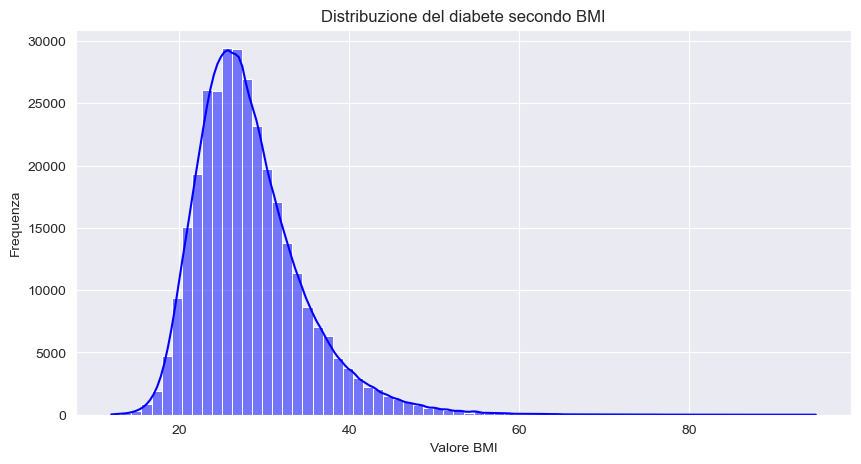

In [3]:
# Importo le librerie necessarie
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Creazione del plot della distribuzione utilizzando Seaborn
# Studio la distribuzione sulla base dei valori del BMI
sns.set_style('darkgrid') 
plt.figure(figsize=(10, 5)) 
sns.histplot(data['BMI'], kde=True, color='blue', bins=70) 
plt.title('Distribuzione del diabete secondo BMI') 
plt.xlabel('Valore BMI') 
plt.ylabel('Frequenza') 

# Stampa del grafico
plt.show()

c:\Users\Giulia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Giulia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


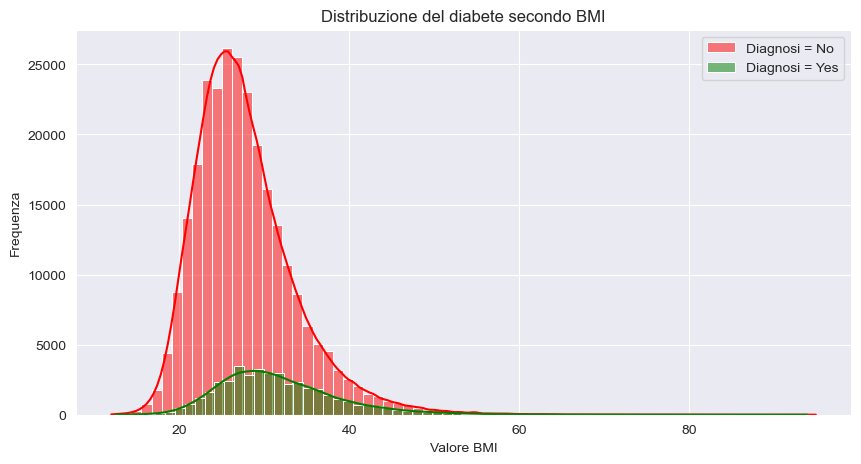

In [4]:
# Seleziono i valori del dataset con Diagnosi = 0
senza_diabete_0 = data[data['Diabetic'] == 'No']

# Seleziono i valori del dataset con Diagnosi = 0
con_diabete_1 = data[data['Diabetic'] == 'Yes']

# Grafico la distribuzione il dataset in con e senza diabete
plt.figure(figsize=(10, 5))

# Senza diabete in rosso
sns.histplot(senza_diabete_0['BMI'], kde=True, color='red', bins=70, label='Diagnosi = No')
# Con diabete in verde
sns.histplot(con_diabete_1['BMI'], kde=True, color='green', bins=70, label='Diagnosi = Yes')

plt.title('Distribuzione del diabete secondo BMI')
plt.xlabel('Valore BMI')
plt.ylabel('Frequenza')
plt.legend()

plt.show()

In [5]:
# Importo le librerie necessarie
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Seleziono la sola colonna del BMI dal dataset
X = data[['BMI']]  
y = data['Diabetic']

# Divisione dei dati in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Calcola le probabilità a priori con e senza diabete
P_con_diabete = np.mean(y_train == 'Yes')
P_senza_diabete = 1 - P_con_diabete

# Calcola media e varianza per i casi con diabete
mu_con = np.mean(X_train[y_train == 'Yes']['BMI'])
sigma_con = np.var(X_train[y_train == 'Yes']['BMI'], ddof=1)
# Calcola media e varianza per i casi senza diabete
mu_senza = np.mean(X_train[y_train == 'No']['BMI'])
sigma_senza = np.var(X_train[y_train == 'No']['BMI'], ddof=1)

In [6]:
# Funzione per calcolare la densità di probabilità per una distribuzione normale
def prob_normale(x, mean, var):
    return (1 / np.sqrt(2 * np.pi * var)) * np.exp(-((x - mean) ** 2) / (2 * var))

In [7]:
# Calcolo della probabilità di diabete per ogni record del testset
probabilita_diabete = []
for x in X_test['BMI']:
    prob_norm_con = prob_normale(x, mu_con, sigma_con)
    prob_norm_senza = prob_normale(x, mu_senza, sigma_senza)
    # Teorema di Bayes
    prob_diabete = (prob_norm_con * P_con_diabete) / (prob_norm_con * P_con_diabete + prob_norm_senza * P_senza_diabete)
    probabilita_diabete.append(prob_diabete)

# I valori calcolari > di 0.5 saranno classificati come presenza di diabete, altrimenti assenza di diabete
val_predetti = ['Yes' if p >= 0.5 else 'No' for p in probabilita_diabete]

# Calcolo l'accuratezza
accuratezza = sum(predizione == reale for predizione, reale in zip(val_predetti, y_test)) / len(y_test)

print(f"L'accuratezza dell'algoritmo sul set di test è: {accuratezza:.2f}")

L'accuratezza dell'algoritmo sul set di test è: 0.83


In [8]:
probabilita_diabete

[0.08066201009768882,
 0.08137309792755576,
 0.07116577256293068,
 0.12446684209998066,
 0.09749237582740371,
 0.08877773186214874,
 0.093893396353506,
 0.23942526791910623,
 0.07053873139992649,
 0.12325217025559014,
 0.2444056996253314,
 0.07306231895659641,
 0.1662464539371993,
 0.07862097053719401,
 0.06757128103584026,
 0.08468580052104907,
 0.06839718373777912,
 0.1545676349473362,
 0.10736606282907091,
 0.09687061377054204,
 0.1722785753370992,
 0.07324431852355365,
 0.07604710148594923,
 0.07061665102413567,
 0.12977088338419682,
 0.1545676349473362,
 0.0674390382741095,
 0.08492866988303037,
 0.08833793917342836,
 0.10736606282907091,
 0.09408520613385464,
 0.0736172109851427,
 0.08721130436225683,
 0.23779060664002416,
 0.07372594592873433,
 0.10652123343576195,
 0.13097337428980038,
 0.09408520613385464,
 0.18248317265561795,
 0.2673446156200991,
 0.18248317265561795,
 0.09313545169552362,
 0.08905561433531904,
 0.11510075107700561,
 0.13545477855043736,
 0.10527842913230491

In [9]:
val_predetti

['No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No'